# Scaling table for NCMAS grant for 2021
A lot of this is copied from plot_access_om2_scaling.ipynb

In [26]:
import matplotlib.pyplot as plt
import parse_access_om2_results as par
import plot_access_om2_scaling as pas
import plot_pandas_data as ppd
import plot_right_axis_time as pra
from convert_time import days_to_gregorian_years, gregorian_years_to_days
import csv

In [2]:
df = par.parse_om2_dataframe("/g/data/v45/pcl900/access-om2/archive/")  #("../archive")

In [3]:
ocean_cice_ratio_middle = 7

In [4]:
const_ice_nbr_blocks = 5767

In [5]:
high_ice_ncpus=df[df["ocean_ncpus"] / df["ice_ncpus"] <= ocean_cice_ratio_middle]
low_ice_ncpus=df[df["ocean_ncpus"] / df["ice_ncpus"] > ocean_cice_ratio_middle]

In [6]:
low_ncpus_const_blocks=low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] == const_ice_nbr_blocks]
low_ncpus_var_blocks=low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] != const_ice_nbr_blocks]

In [15]:
def get_mean(df, x, y):
    mean_y_by_x=dict()
    group_ncpus=df.groupby(x)
    for name, group in group_ncpus:
        means = group.groupby(x)[y].mean()
        mean_y_by_x[name] = means[name]
    return mean_y_by_x

In [16]:
def round_dict(d, n):
    return {k: round(v, n) for k, v in d.items()}

In [17]:
def days_to_years_dict(d):
    return {k: days_to_gregorian_years(v) for k, v in d.items()}

In [46]:
mom_mean = get_mean(high_ice_ncpus,"ocean_ncpus","Ocean per step")

In [47]:
mom_ncpus = list(mom_mean.keys())
mom_ncpus.sort()
mom_ncpus

[2240, 4358, 8432, 16548]

In [48]:
with open('mom_timing.csv', 'w', newline='') as csvfile:
    csvw = csv.writer(csvfile, dialect='excel', lineterminator='\n')
    csvw.writerow(['MOM5 0.1° cores', 'Mean walltime per step (s)', 'Mean CPU hr per step'])
    for c in mom_ncpus:
        csvw.writerow([c, round(mom_mean[c], 3), round(c*mom_mean[c]/3600, 3)])

Text(0, 0.5, 'Ocean TimeLoop walltime per step')

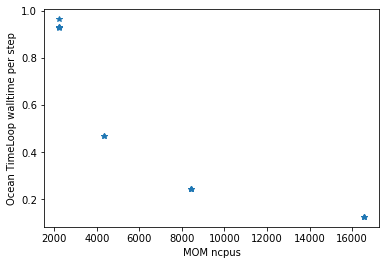

In [49]:
plt.plot(high_ice_ncpus['ocean_ncpus'], high_ice_ncpus['Ocean per step'], '*')
plt.xlabel('MOM ncpus')
plt.ylabel('Ocean TimeLoop walltime per step')

Text(0, 0.5, 'Ocean CPU hr per step')

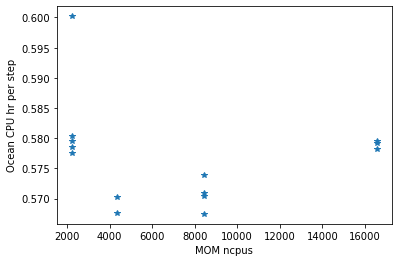

In [50]:
plt.plot(high_ice_ncpus['ocean_ncpus'], high_ice_ncpus['ocean_ncpus']*high_ice_ncpus['Ocean per step']/3600, '*')
plt.xlabel('MOM ncpus')
plt.ylabel('Ocean CPU hr per step')

In [34]:
cice_mean = get_mean(high_ice_ncpus,"ice_ncpus","Ice TimeLoop per step")

In [35]:
ice_ncpus = list(cice_mean.keys())
ice_ncpus.sort()
ice_ncpus

[399, 799, 1599, 3199]

In [36]:
with open('cice_timing.csv', 'w', newline='') as csvfile:
    csvw = csv.writer(csvfile, dialect='excel', lineterminator='\n')
    csvw.writerow(['CICE5 0.1° cores', 'Mean walltime per step (s)', 'Mean CPU hr per step'])
    for c in ice_ncpus:
        csvw.writerow([c, round(cice_mean[c], 3), round(c*cice_mean[c]/3600, 3)])

Text(0, 0.5, 'Ice TimeLoop walltime per step')

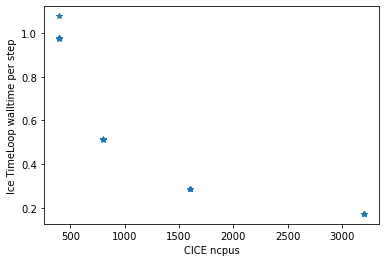

In [8]:
plt.plot(high_ice_ncpus['ice_ncpus'], high_ice_ncpus['Ice TimeLoop per step'], '*')
plt.xlabel('CICE ncpus')
plt.ylabel('Ice TimeLoop walltime per step')

Text(0, 0.5, 'Ice CPU hr per step')

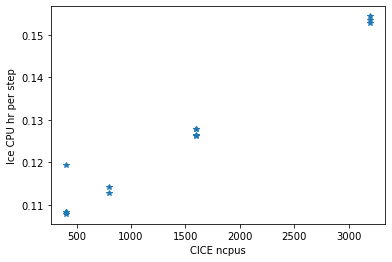

In [37]:
plt.plot(high_ice_ncpus['ice_ncpus'], high_ice_ncpus['ice_ncpus']*high_ice_ncpus['Ice TimeLoop per step']/3600, '*')
plt.xlabel('CICE ncpus')
plt.ylabel('Ice CPU hr per step')

In [11]:
allkeys = [k for k in df.keys()]
allkeys.sort()
allkeys

['(Ocean C-grid lap frict)',
 '(Ocean C-grid lap frict) per step',
 '(Ocean C-grid lap frict) speed',
 '(Ocean CT2PT: 1)',
 '(Ocean CT2PT: 1) per step',
 '(Ocean CT2PT: 1) speed',
 '(Ocean CT2PT: 2)',
 '(Ocean CT2PT: 2) per step',
 '(Ocean CT2PT: 2) speed',
 '(Ocean CT2PT: 3)',
 '(Ocean CT2PT: 3) per step',
 '(Ocean CT2PT: 3) speed',
 '(Ocean ODA)',
 '(Ocean ODA) per step',
 '(Ocean ODA) speed',
 '(Ocean TPM bbc)',
 '(Ocean TPM bbc) per step',
 '(Ocean TPM bbc) speed',
 '(Ocean TPM source)',
 '(Ocean TPM source) per step',
 '(Ocean TPM source) speed',
 '(Ocean TPM tracer)',
 '(Ocean TPM tracer) per step',
 '(Ocean TPM tracer) speed',
 '(Ocean adv_vel_diag: nrho-trans)',
 '(Ocean adv_vel_diag: nrho-trans) per step',
 '(Ocean adv_vel_diag: nrho-trans) speed',
 '(Ocean adv_vel_diag: numerics)',
 '(Ocean adv_vel_diag: numerics) per step',
 '(Ocean adv_vel_diag: numerics) speed',
 '(Ocean adv_vel_diag: rho-trans)',
 '(Ocean adv_vel_diag: rho-trans) per step',
 '(Ocean adv_vel_diag: rho-tran